# Problem 2: Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

Data Dictionary:
<br>Variable Name	Description
<br>Holiday_Package 	 Opted for Holiday Package yes/no?
<br>Salary 	 Employee salary
<br>age 	 Age in years
<br>edu 	 Years of formal education
<br>no_young_children 	 The number of young children (younger than 7 years)
<br>no_older_children 	 Number of older children
<br>foreign 	 foreigner Yes/No

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

### Importing data

In [10]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("Holiday_Package.csv")  

## 1.	Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis

### EDA

In [11]:
# Check top few records to get a feel of the data structure
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [12]:
# drop the "Unnamed: 0" column as it is useless for the model
df = df.drop('Unnamed: 0', axis=1)

In [13]:
df.shape

(872, 7)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [15]:
df.describe(include="all")

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


### unique values for categorical variables

In [16]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




### Converting categorical to dummy variables

In [17]:
#df = pd.get_dummies(df, columns=['room_type','cancellation_policy','cleaning_fee'],drop_first=True)

### Drop missing values

In [18]:
# Are there any missing values ?
df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [19]:
df = df.dropna()

### Checking for duplicates

In [20]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


In [14]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (872, 7)
After (872, 7)


In [15]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Correlation Plot

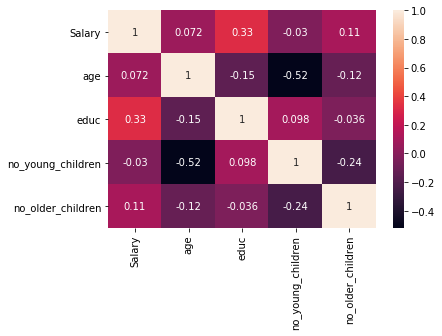

In [16]:
sns.heatmap(df.corr(),annot=True)
#plt.gcf().set_size_inches(29, 15)
plt.show()

### Covariance Plot

In [17]:
df.cov()

,Salary,age,educ,no_young_children,no_older_children
Salary,5.484340e+08,17719.779229,23218.662341,-425.752915,2895.613755
age,1.771978e+04,111.337837,-4.783024,-3.356871,-1.332573
educ,2.321866e+04,-4.783024,9.218867,0.183012,-0.119851
no_young_children,-4.257529e+02,-3.356871,0.183012,0.375610,-0.158807
no_older_children,2.895614e+03,-1.332573,-0.119851,-0.158807,1.181104


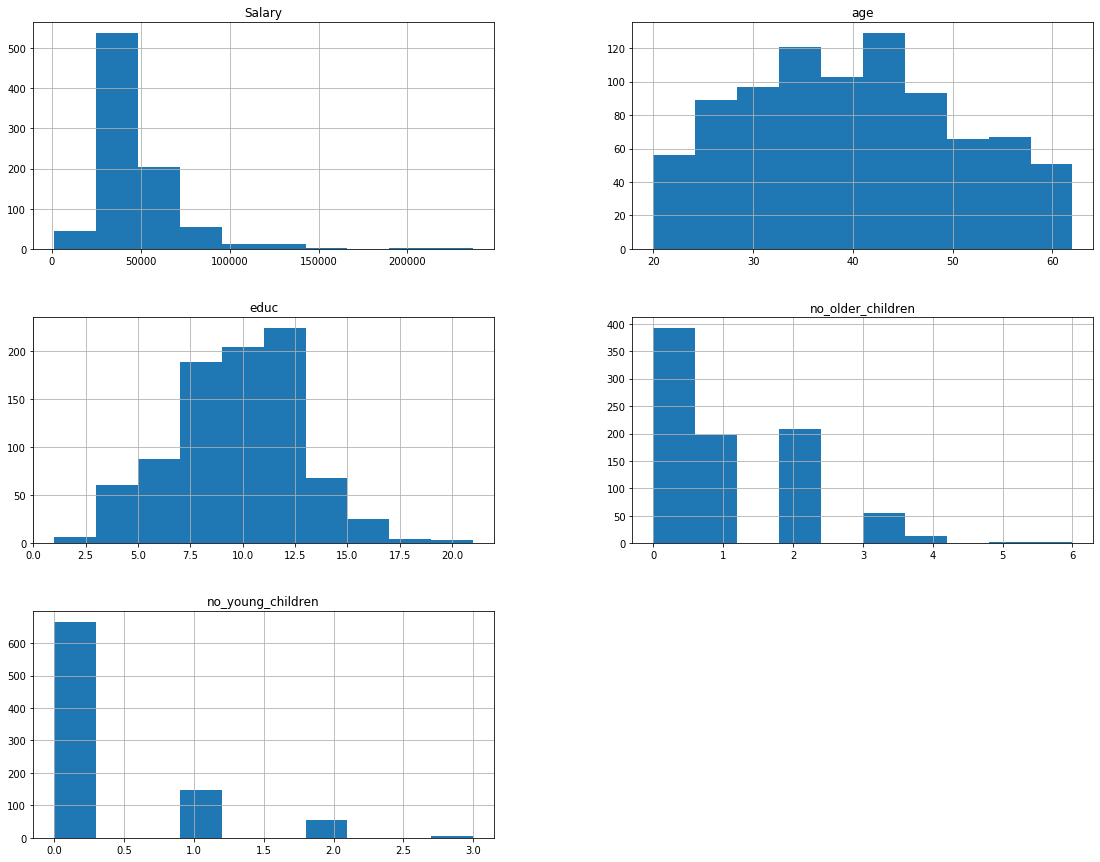

In [18]:
df.hist(figsize=(19,15));

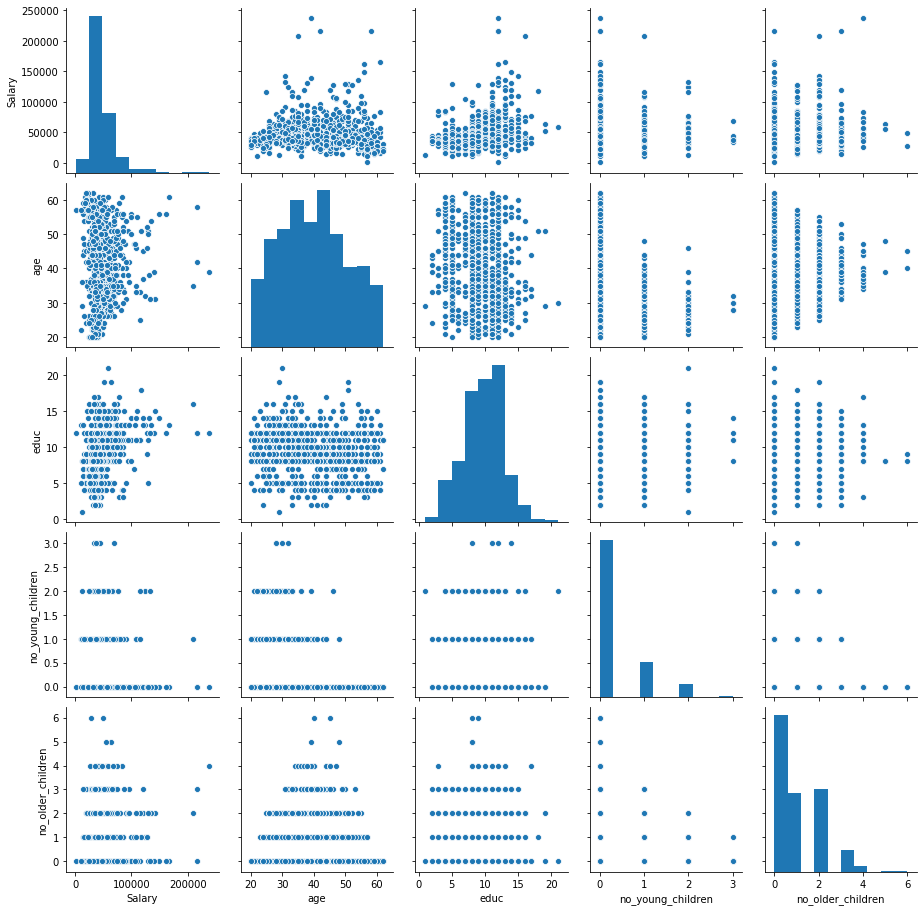

In [8]:
sns.pairplot(df)

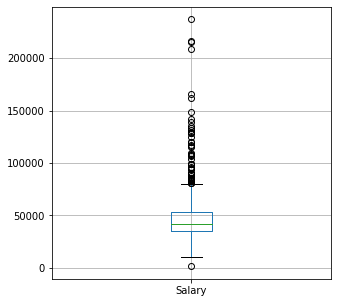

In [22]:
df.boxplot(column="Salary",return_type='axes',figsize=(5,5));

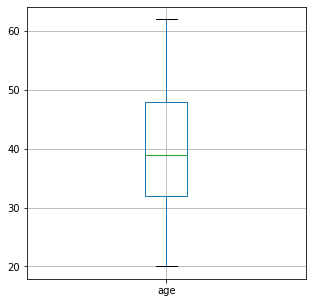

In [23]:
df.boxplot(column="age",return_type='axes',figsize=(5,5));

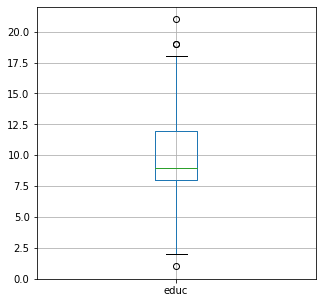

In [24]:
df.boxplot(column="educ",return_type='axes',figsize=(5,5));

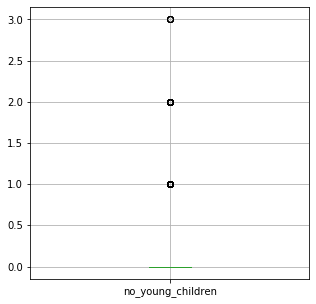

In [25]:
df.boxplot(column="no_young_children",return_type='axes',figsize=(5,5));

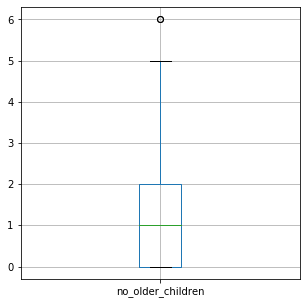

In [26]:
df.boxplot(column="no_older_children",return_type='axes',figsize=(5,5));

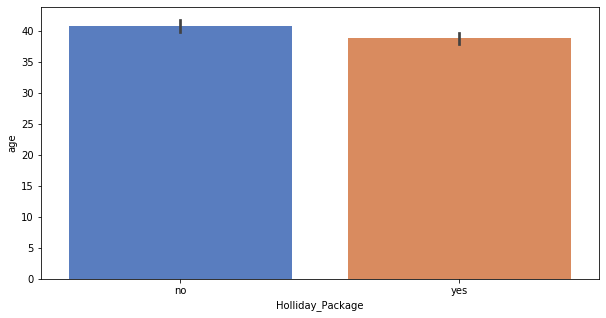

In [34]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='Holliday_Package', y='age', data=df, palette='muted')  # barplot

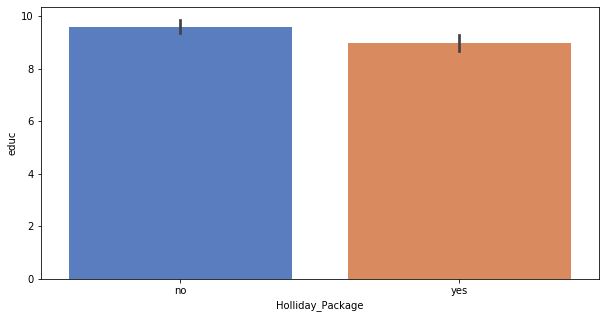

In [35]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='Holliday_Package', y='educ', data=df, palette='muted')  # barplot

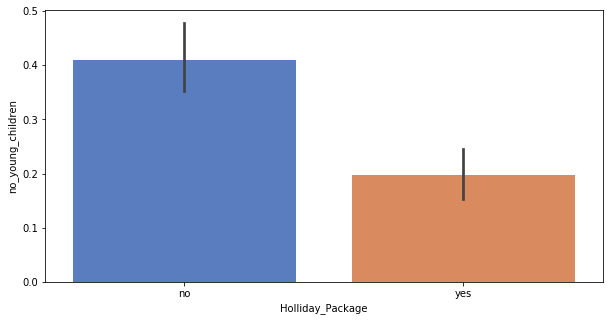

In [36]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='Holliday_Package', y='no_young_children', data=df, palette='muted')  # barplot

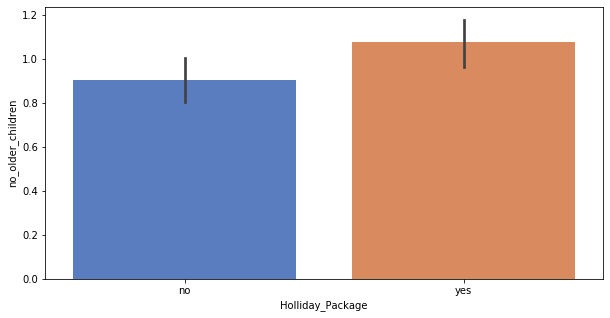

In [37]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='Holliday_Package', y='no_older_children', data=df, palette='muted')  # barplot

### Data Distribution

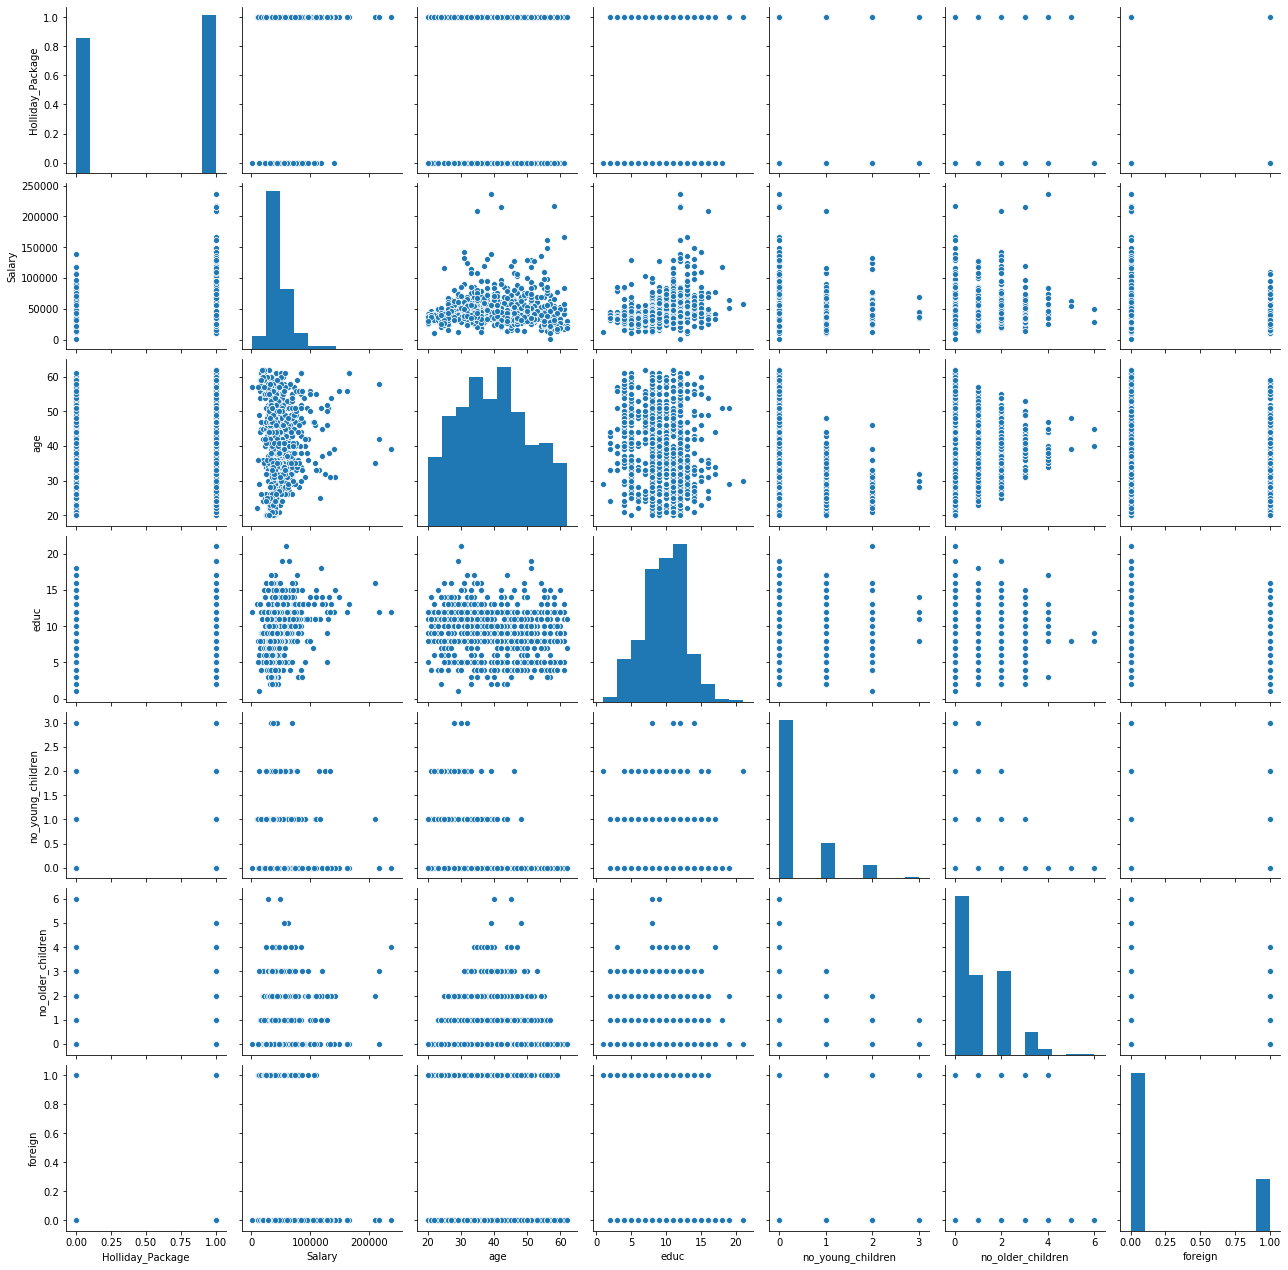

In [99]:
#df_attr = (df[cont])
sns.pairplot(df)  
plt.show()

In [100]:
# Check for missing value in any column
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

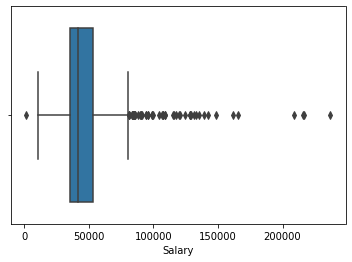

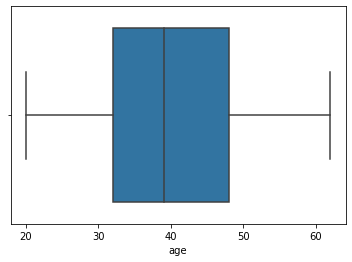

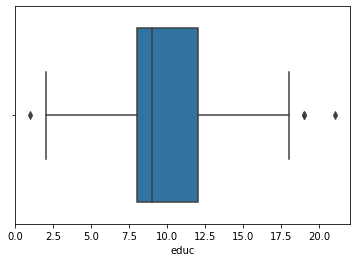

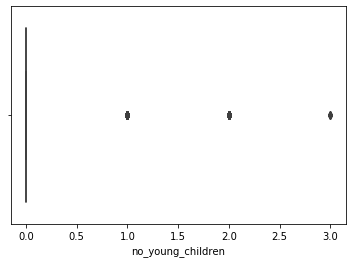

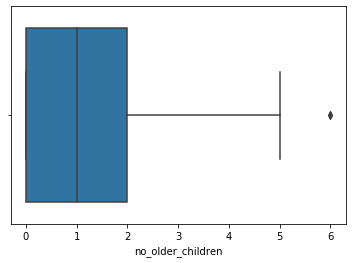

In [58]:
cols = ['Salary', 'age', 'educ', 'no_young_children',
       'no_older_children']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

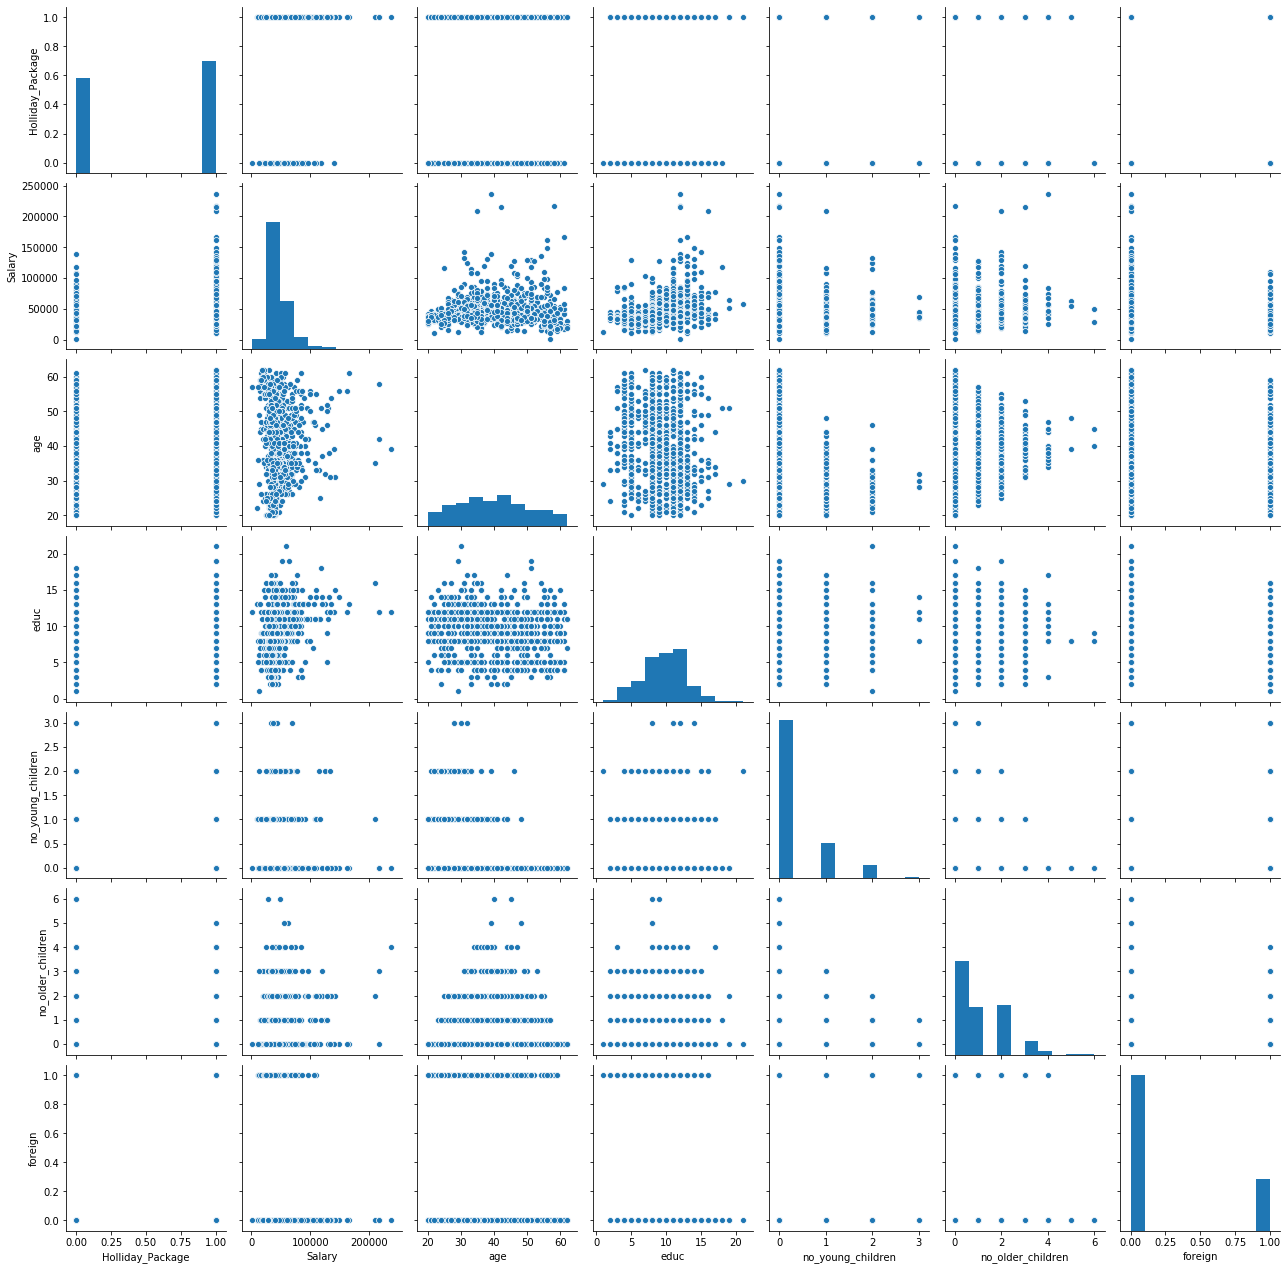

In [101]:
# Pairplot using sns
sns.pairplot(df ,diag_kind='hist');

## 2.   Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
ohe = OneHotEncoder(categories='auto')
df['Holliday_Package'] = ohe.fit_transform(df[['Holliday_Package']]).toarray()
df['foreign'] = ohe.fit_transform(df[['foreign']]).toarray()
df

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1.0,48412,30,8,1,1,1.0
1,0.0,37207,45,8,0,1,1.0
2,1.0,58022,46,9,0,0,1.0
3,1.0,66503,31,11,2,0,1.0
4,1.0,66734,44,12,0,2,1.0
...,...,...,...,...,...,...,...
867,1.0,40030,24,4,2,1,0.0
868,0.0,32137,48,8,0,0,0.0
869,1.0,25178,24,6,2,0,0.0
870,0.0,55958,41,10,0,1,0.0


### Train-Test Split

In [93]:
# Copy all the predictor variables into X dataframe
X = df.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = df[['Holliday_Package']]

In [94]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

### Logistic Regression model

In [98]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.7s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=2, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001,
                   verbose=True, warm_start=False)

In [102]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [103]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.239601,0.760399
1,0.726740,0.273260
2,0.097376,0.902624
3,0.021860,0.978140
4,0.486774,0.513226


In [104]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6786885245901639

AUC: 0.743


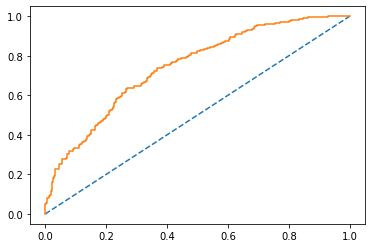

In [105]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [106]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6374045801526718

AUC: 0.743


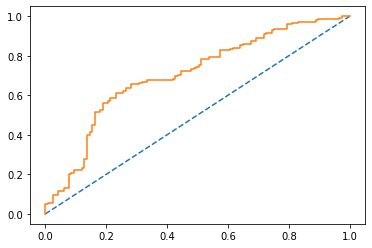

In [107]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [108]:
confusion_matrix(y_train, ytrain_predict)

array([[162, 122],
       [ 74, 252]], dtype=int64)

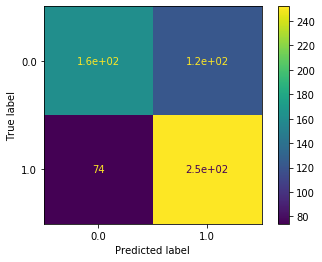

In [109]:
plot_confusion_matrix(model,X_train,y_train);

In [110]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.69      0.57      0.62       284
         1.0       0.67      0.77      0.72       326

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



In [111]:
confusion_matrix(y_test, ytest_predict)

array([[ 65,  52],
       [ 43, 102]], dtype=int64)

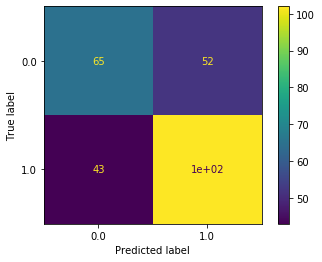

In [112]:
plot_confusion_matrix(model,X_test,y_test);

In [113]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.60      0.56      0.58       117
         1.0       0.66      0.70      0.68       145

    accuracy                           0.64       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



### Applying GridSearchCV for Logistic Regression

In [114]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [115]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [116]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [117]:
grid_search.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=2, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [118]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=2, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)


In [119]:
best_model = grid_search.best_estimator_

In [120]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [121]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.404493,0.595507
1,0.454630,0.545370
2,0.447995,0.552005
3,0.342797,0.657203
4,0.465389,0.534611


              precision    recall  f1-score   support

         0.0       1.00      0.00      0.01       284
         1.0       0.54      1.00      0.70       326

    accuracy                           0.54       610
   macro avg       0.77      0.50      0.35       610
weighted avg       0.75      0.54      0.38       610
 



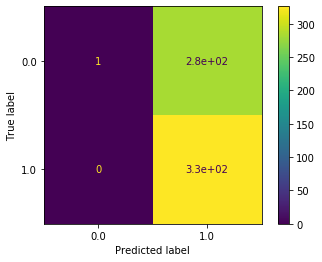

In [122]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       117
         1.0       0.55      1.00      0.71       145

    accuracy                           0.55       262
   macro avg       0.28      0.50      0.36       262
weighted avg       0.31      0.55      0.39       262
 



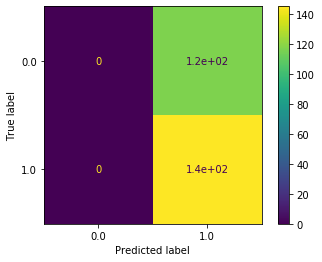

In [123]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

### LDA

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Holliday_Package',axis=1)
Y = df.Holliday_Package

In [ ]:
test_size = 0.30
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_predict = model.predict(X_test)

In [27]:
model_score = model.score(X_test, y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.5267175572519084


In [28]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_predict))

Confusion Matrix 
 [[  0 124]
 [  0 138]] 

Classification Report 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       124
         1.0       0.53      1.00      0.69       138

    accuracy                           0.53       262
   macro avg       0.26      0.50      0.35       262
weighted avg       0.28      0.53      0.36       262



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
